# library
networkx
matplotlib.pyplot


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Golbal variables
define the start node and the end node

In [2]:
# define the source and sink
source = 0
sink = 5

# Generate the network flow graph

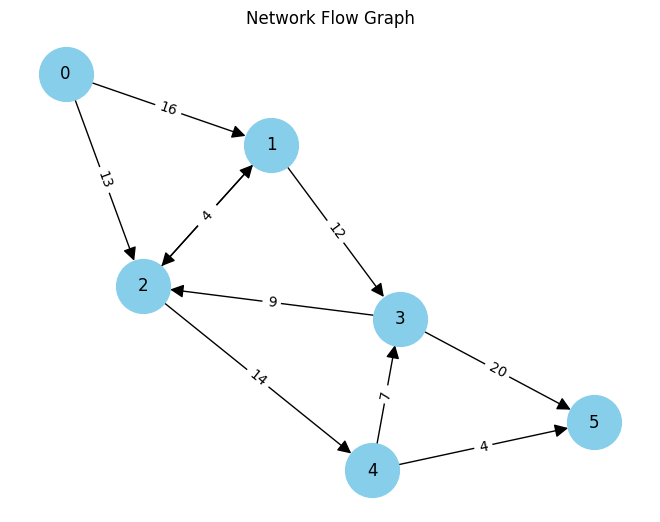

In [3]:
G = nx.DiGraph()
# add nodes
G.add_nodes_from([0, 1, 2, 3, 4, 5])

# add edges and capacity
edges = [(0, 1, {'capacity': 16}),
         (0, 2, {'capacity': 13}),
         (1, 2, {'capacity': 10}),
         (1, 3, {'capacity': 12}),
         (2, 1, {'capacity': 4}),
         (2, 4, {'capacity': 14}),
         (3, 2, {'capacity': 9}),
         (3, 5, {'capacity': 20}),
         (4, 3, {'capacity': 7}),
         (4, 5, {'capacity': 4})]
G.add_edges_from(edges)

# draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, arrowsize=20)
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Flow Graph')
plt.show()

In [4]:
# find the maximum flow using the library function
max_flow_value, max_flow_dict = nx.maximum_flow(G, source, sink)
print("Maximum flow: ", max_flow_value)
print("Path:", max_flow_dict)

Maximum flow:  23
Path: {0: {1: 13, 2: 10}, 1: {2: 1, 3: 12}, 2: {1: 0, 4: 11}, 3: {2: 0, 5: 19}, 4: {3: 7, 5: 4}, 5: {}}


# Our calssic solution

In [8]:
# Solve the maximum flow problem using the Ford-Fulkerson algorithm
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)
        self.parent = [-1] * self.ROW

    # Using BFS as a searching algorithm
    def BFS(self, s, t):
        visited = [False] * self.ROW
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:
            cur = queue.pop(0)

            for ind, val in enumerate(self.graph[cur]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    self.parent[ind] = cur

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        max_flow = 0

        # while it has a path from source to sink, find the shortest path and add the flow
        while self.BFS(source, sink):
            path_flow = float("Inf")
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[self.parent[s]][s])
                s = self.parent[s]

            max_flow += path_flow
            v = sink
            while v != source:
                u = self.parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow # add a reverse edge
                v = self.parent[v]
        return max_flow


def plot_graph(graph, path=None):
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            if graph[i][j] > 0:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, arrowsize=20)

    if path:
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Network Flow Graph')
    plt.show()

# convert the graph to an adjacency matrix
# initialize adjacency matrix with zeros
nodes_order = list(G.nodes())
adj_matrix = np.zeros((len(nodes_order), len(nodes_order)))
# fill adjacency matrix based on edges and capacities
for edge in edges:
    u, v, attr = edge
    u_index = nodes_order.index(u)
    v_index = nodes_order.index(v)
    capacity = attr['capacity']
    adj_matrix[u_index][v_index] = capacity
print("adj_matrix: ")
print(adj_matrix)

g = Graph(adj_matrix)
max_flow = g.ford_fulkerson(source, sink)
print("Maximum flow: ", max_flow)


adj_matrix: 
[[ 0. 16. 13.  0.  0.  0.]
 [ 0.  0. 10. 12.  0.  0.]
 [ 0.  4.  0.  0. 14.  0.]
 [ 0.  0.  9.  0.  0. 20.]
 [ 0.  0.  0.  7.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.]]
Maximum flow:  23.0
